In [1]:
##Import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Read in DTM 
state_dtm = pd.read_csv('state_tweets_dtm.csv')
state_dtm.head()

,State,access,accessible,activists,activity,additional,advance,advanced,advocate,affairs,...,women,won,working,wouldbospoli,wts,wyoming,yallbiden,york,zachandmattshow,zeynep
0,Alabama,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alaska,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arizona,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arkansas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,California,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Try sorting by top words, to make a graph
test_sort = state_dtm.sort_values(by = [col for col in state_dtm.columns], ascending = False)
test_sort.head()

,State,access,accessible,activists,activity,additional,advance,advanced,advocate,affairs,...,women,won,working,wouldbospoli,wts,wyoming,yallbiden,york,zachandmattshow,zeynep
37,Wyoming,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36,Wisconsin,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
35,Washington,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,Virginia,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,Utah,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Try out printing top 5 words mentioned in each state
top_dict = {}
for c in state_dtm.columns:
    top = state_dtm[c].sort_values(ascending = False).head(5)
    top_dict[c] = list(zip(state_dtm.State, top.values))
#top_dict

In [5]:
top_words = pd.DataFrame.from_dict(top_dict, orient = 'index', columns = ['A', 'B', 'C', 'D', 'E']).reset_index()
top_words.head()

,index,A,B,C,D,E
0,State,"(Alabama, Wyoming)","(Alaska, Wisconsin)","(Arizona, Washington)","(Arkansas, Virginia)","(California, Utah)"
1,access,"(Alabama, 1)","(Alaska, 0)","(Arizona, 0)","(Arkansas, 0)","(California, 0)"
2,accessible,"(Alabama, 1)","(Alaska, 0)","(Arizona, 0)","(Arkansas, 0)","(California, 0)"
3,activists,"(Alabama, 2)","(Alaska, 0)","(Arizona, 0)","(Arkansas, 0)","(California, 0)"
4,activity,"(Alabama, 1)","(Alaska, 0)","(Arizona, 0)","(Arkansas, 0)","(California, 0)"


In [6]:
state_dtm.head()

,State,access,accessible,activists,activity,additional,advance,advanced,advocate,affairs,...,women,won,working,wouldbospoli,wts,wyoming,yallbiden,york,zachandmattshow,zeynep
0,Alabama,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alaska,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arizona,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arkansas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,California,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Import in corpus to make wordclouds
corpus = pd.read_csv('state_tweets_corpus.csv')
corpus.head()

,Unnamed: 0,Tweets,State
0,0,pyroroze alexonpatrol mrteekay sparklepants t...,Alabama
1,1,good day everyone i came across this article i...,Alaska
2,2,pardon our progress public transit in phoenix ...,Arizona
3,3,danwhitcongress arkansas could really use the ...,Arkansas
4,4,jpbrammer wienerschnitzel hot dog stand soquel...,California


In [9]:
corpus.Tweets

In [14]:
corpus

,Unnamed: 0,Tweets,State
0,0,pyroroze alexonpatrol mrteekay sparklepants t...,Alabama
1,1,good day everyone i came across this article i...,Alaska
2,2,pardon our progress public transit in phoenix ...,Arizona
3,3,danwhitcongress arkansas could really use the ...,Arkansas
4,4,jpbrammer wienerschnitzel hot dog stand soquel...,California
5,5,on november policies supporting public transp...,Colorado
6,6,i have a request for cttransit govnedlamontive...,Connecticut
7,7,zeynep anneapplebaum florida increased the min...,Florida
8,8,what can reverendwarnock do for georgia🏗️expan...,Georgia
9,9,zachandmattshow from ut mayor of salt lake ci...,Illinois


In [11]:
stopwords = set(STOPWORDS)

In [12]:
#Try wordcloud
wordcloud = WordCloud(width = 800, height = 800,\
                      background_color = 'white', \
                     stopwords = stopwords, \
                     min_font_size = 10).generate(alabama_test)

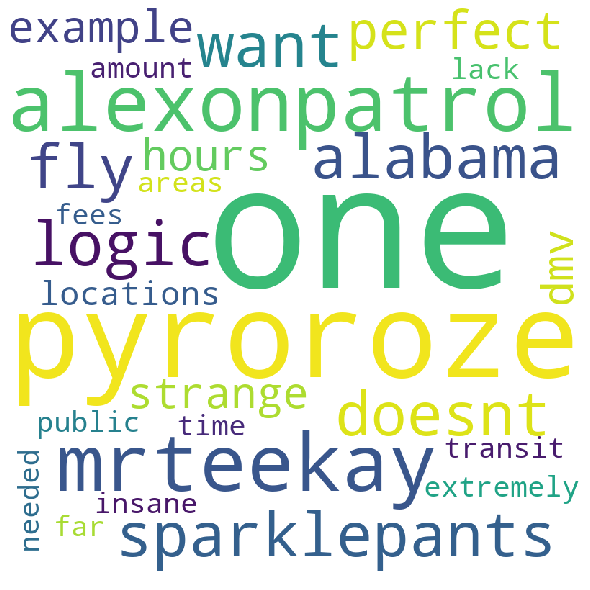

In [13]:
#Plot wordcloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()